# Regularized Linear Regression
**by. 18012635 양원석(Wonseok Yang)**

---


## 1. Loading data from URL
**pandas.read_csv(filepath_or_buffer, header='infer', sep=‘,’)**

In [ ]:
import pandas as pd
# Load housing data from URL to a DataFrame
url = "https://raw.githubusercontent.com/rasbt/python-machine-learning-book-3rd-edition/master/ch10/housing.data.txt"
df = pd.read_csv(filepath_or_buffer=url, header=None, sep="\s+")

# Assign the column names
df.columns = ['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX', 'PTRATIO', 'B', 'LSTAT', 'MEDV']

# Have a look at the data shape and entries
# Showing the first 5 rows with .head()
# Remove .head() to show all the entries
print(df.shape)
df.head()

(506, 14)


,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222.0,18.7,396.90,5.33,36.2


## 2. Basic polynomial regression

In [ ]:
import warnings
warnings.filterwarnings('ignore')

import matplotlib.pyplot as plt
import numpy as np
np.random.seed(5)

from sklearn.preprocessing import PolynomialFeatures, StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

RANDOM_STATE = 21

# Select MEDV, and LSTAT as X and y, respectively
sample = 10
df_sample = df.sample(sample, random_state=RANDOM_STATE, replace=False)
df_test = df.loc[~df.index.isin(df_sample.index)].sample(200, random_state=RANDOM_STATE, replace=False)

# Generate polynomial features with degree = 8
degree = 5
poly = PolynomialFeatures(degree=degree)

X = df_sample[['LSTAT']].values
y = df_sample['MEDV'].values

X_test = df_test[['LSTAT']].values
y_test = df_test['MEDV'].values
X_fit = np.arange(min(X.min(), X_test.min()), max(X.max(), X_test.max()), 0.2)[:, np.newaxis]

X_poly = poly.fit_transform(X)
X_poly_test = poly.fit_transform(X_test)

regr = LinearRegression()
regr.fit(X_poly, y)

y_poly_fit = regr.predict(poly.fit_transform(X_fit))
y_pred = regr.predict(X_poly)

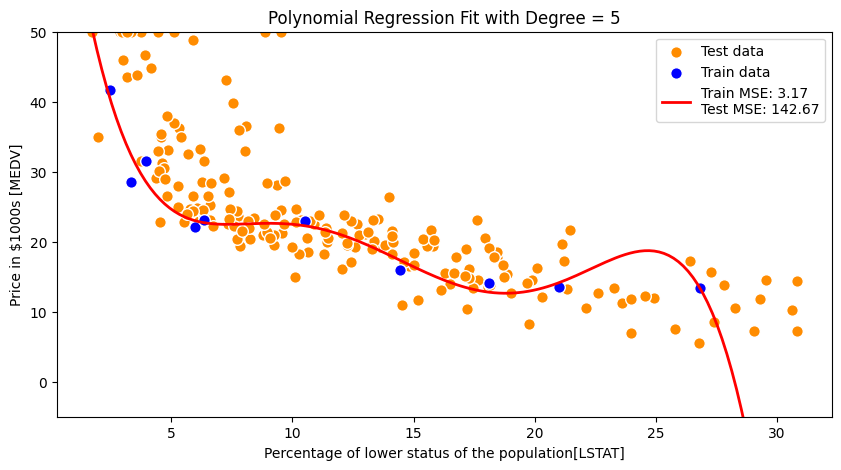

In [ ]:
# Calculate MSE
poly_mse = mean_squared_error(y, regr.predict(X_poly))
poly_mse_test = mean_squared_error(y_test, regr.predict(X_poly_test))

plt.figure(figsize=(10,5))

# plt.scatter(X_train, y_train, c='green', edgecolor='white', s=70, label='Train data')
plt.scatter(X_test, y_test, c='darkorange', edgecolor='white', s=70, label='Test data')
plt.scatter(X, y, c='blue', edgecolor='white', s=70, label='Train data')

plt.plot(X_fit, y_poly_fit, color='red', lw=2, label='Train MSE: %s\nTest MSE: %s' % (round(poly_mse, 2), round(poly_mse_test, 2)))

plt.ylim(-5, 50)
plt.xlabel('Percentage of lower status of the population[LSTAT]')
plt.ylabel('Price in $1000s [MEDV]')

plt.title("Polynomial Regression Fit with Degree = %s" %degree)
plt.legend()
plt.show()

## 3. Basic linear regression

In [ ]:
print('MSE of Training Data: %.3f' % poly_mse)
print('MSE of Testing Data: %.3f' % poly_mse_test)

MSE of Training Data: 3.175
MSE of Testing Data: 142.674


In [ ]:
poly.fit_transform(X_fit).shape

(146, 6)

In [ ]:
X_poly.shape

(10, 6)

In [ ]:
y.shape

(10,)

## 4. Ridge regression
**sklearn.linear_model.Ridge(alpha=1.0)**

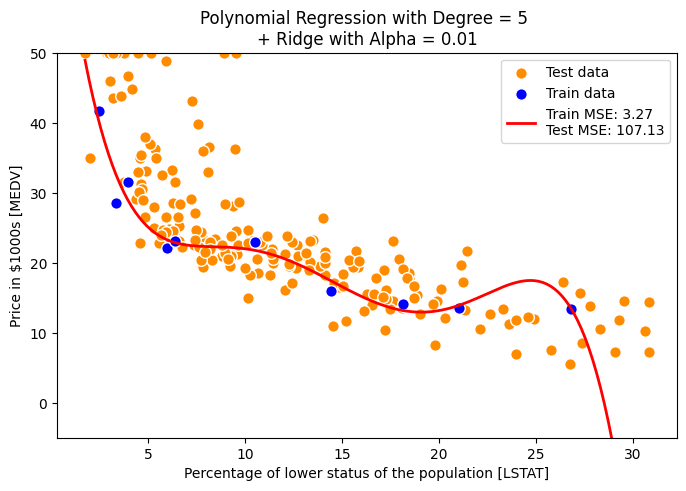

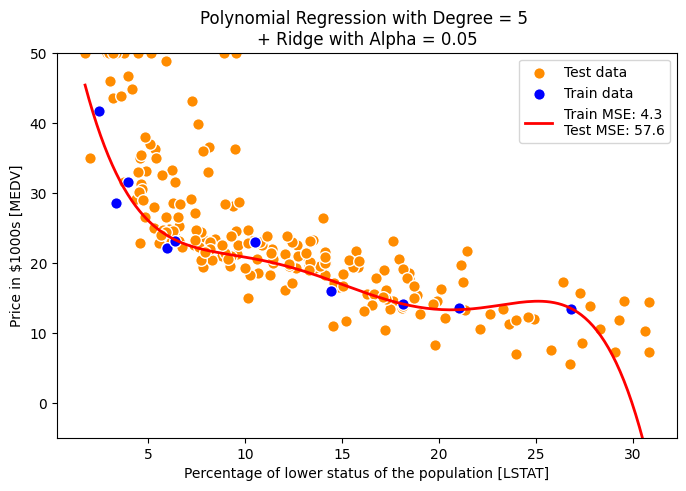

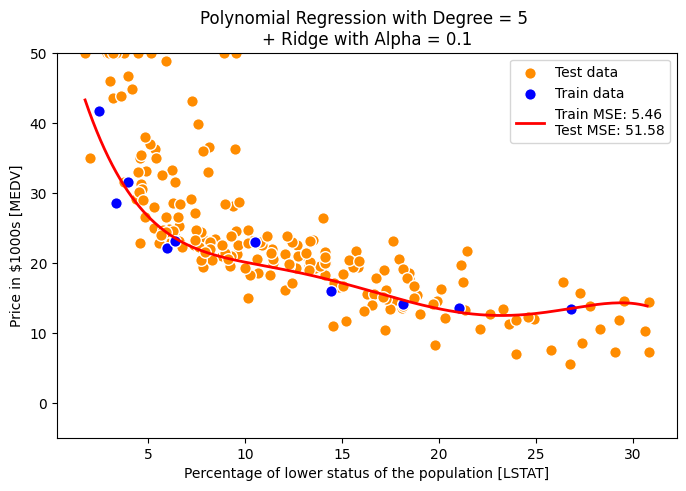

In [ ]:
from sklearn.linear_model import Ridge
alphas = [0.01, 0.05, 0.1]
for alpha in alphas:
  regr_ridge = Ridge(alpha=alpha)
  regr_ridge.fit(X_poly, y)
  y_poly_fit = regr_ridge.predict(poly.fit_transform(X_fit))

  plt.figure(figsize=(8,5))
  plt.scatter(X_test, y_test, c='darkorange', edgecolor='white', s=70, label='Test data')
  plt.scatter(X, y, c='blue', edgecolor='white', s=70, label='Train data')

  # Calculate MSE
  poly_mse = mean_squared_error(y, regr_ridge.predict(X_poly))
  poly_mse_test = mean_squared_error(y_test, regr_ridge.predict(X_poly_test))

  plt.plot(X_fit, y_poly_fit, color='red', lw=2, label='Train MSE: %s\nTest MSE: %s' % (round(poly_mse,2), round(poly_mse_test, 2)))

  plt.xlabel('Percentage of lower status of the population [LSTAT]')
  plt.ylabel('Price in $1000s [MEDV]')
  plt.ylim(-5, 50)
  
  plt.title("Polynomial Regression with Degree = %s \n+ Ridge with Alpha = %s" % (degree, alpha))
  plt.legend()
  plt.show()

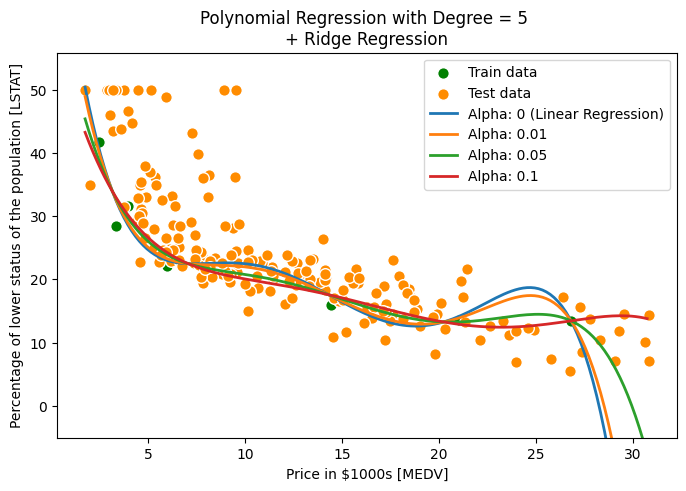

In [ ]:
# Summary plot
plt.figure(figsize=(8,5))

plt.scatter(X, y, c='green', edgecolor='white', s=70, label='Train data')
plt.scatter(X_test, y_test, c='darkorange', edgecolor='white', s=70, label='Test data')

regr = LinearRegression()
regr.fit(X_poly, y)
y_poly_fit = regr.predict(poly.fit_transform(X_fit))
plt.plot(X_fit, y_poly_fit, lw=2, label='Alpha: 0 (Linear Regression)')

for alpha in alphas:
  regr_ridge = Ridge(alpha=alpha)
  regr_ridge.fit(X_poly, y)
  y_poly_fit = regr_ridge.predict(poly.fit_transform(X_fit))
  plt.plot(X_fit, y_poly_fit, lw=2, label='Alpha: %s'% alpha)

plt.ylim(-5)
plt.ylabel('Percentage of lower status of the population [LSTAT]')
plt.xlabel('Price in $1000s [MEDV]')

plt.title("Polynomial Regression with Degree = %s \n+ Ridge Regression" % (degree))
plt.legend()
plt.show()

## Ex 1. Lasso
**sklearn.linear_model.Lasso(alpha=1.0)**

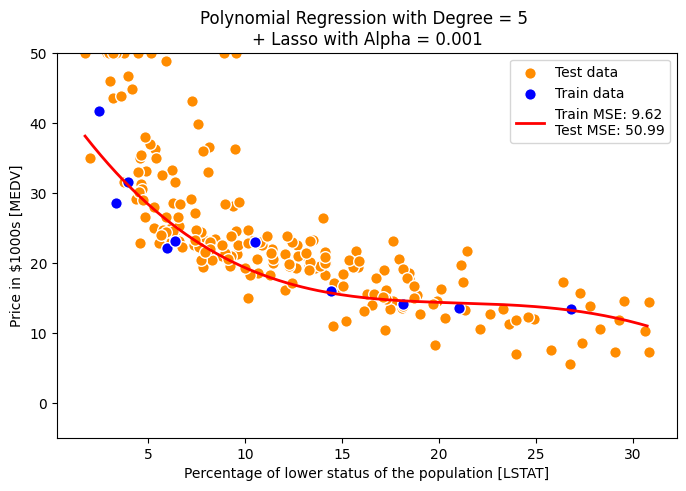

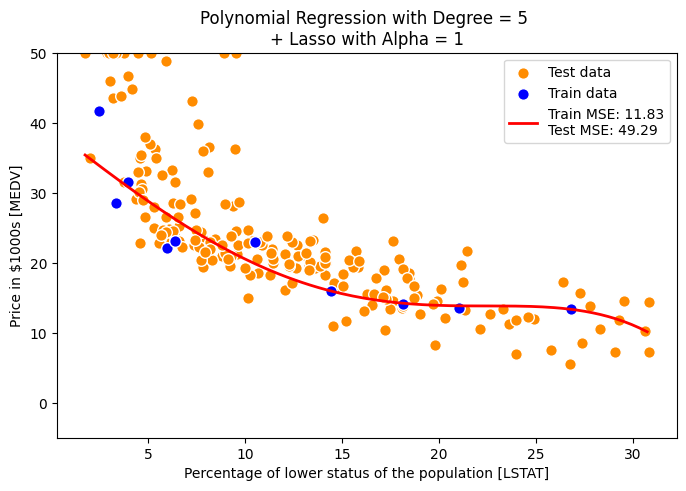

In [ ]:
from sklearn.linear_model import Lasso

alphas = [0.001, 1]

for alpha in alphas:
  regr_lasso = Lasso(alpha=alpha)
  regr_lasso.fit(X_poly, y)
  y_poly_fit = regr_lasso.predict(poly.fit_transform(X_fit))

  plt.figure(figsize=(8,5))
  plt.scatter(X_test, y_test, c='darkorange', edgecolor='white', s=70, label='Test data')
  plt.scatter(X, y, c='blue', edgecolor='white', s=70, label='Train data')

  # Calculate MSE
  poly_mse = mean_squared_error(y, regr_lasso.predict(X_poly))
  poly_mse_test = mean_squared_error(y_test, regr_lasso.predict(X_poly_test))

  plt.plot(X_fit, y_poly_fit, color='red', lw=2, label='Train MSE: %s\nTest MSE: %s' % (round(poly_mse,2), round(poly_mse_test, 2)))

  plt.xlabel('Percentage of lower status of the population [LSTAT]')
  plt.ylabel('Price in $1000s [MEDV]')
  plt.ylim(-5, 50)
  
  plt.title("Polynomial Regression with Degree = %s \n+ Lasso with Alpha = %s" % (degree, alpha))
  plt.legend()
  plt.show()

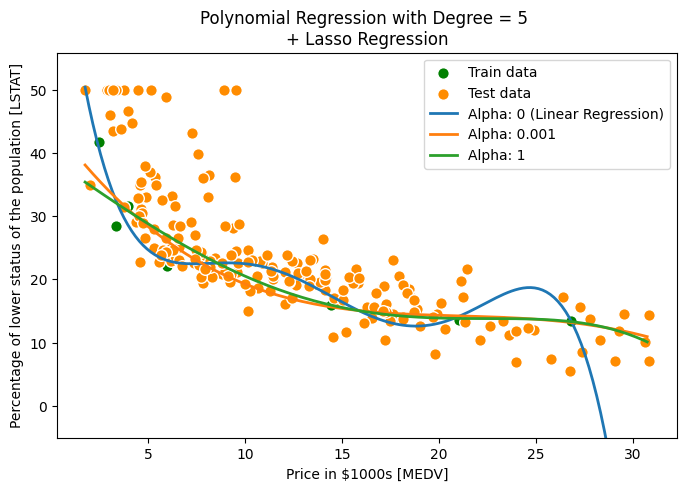

In [ ]:
# Summary plot
plt.figure(figsize=(8,5))

plt.scatter(X, y, c='green', edgecolor='white', s=70, label='Train data')
plt.scatter(X_test, y_test, c='darkorange', edgecolor='white', s=70, label='Test data')

regr = LinearRegression()
regr.fit(X_poly, y)
y_poly_fit = regr.predict(poly.fit_transform(X_fit))
plt.plot(X_fit, y_poly_fit, lw=2, label='Alpha: 0 (Linear Regression)')

for alpha in alphas:
  regr_lasso = Lasso(alpha=alpha)
  regr_lasso.fit(X_poly, y)
  y_poly_fit = regr_lasso.predict(poly.fit_transform(X_fit))
  plt.plot(X_fit, y_poly_fit, lw=2, label='Alpha: %s'% alpha)

plt.ylim(-5)
plt.ylabel('Percentage of lower status of the population [LSTAT]')
plt.xlabel('Price in $1000s [MEDV]')

plt.title("Polynomial Regression with Degree = %s \n+ Lasso Regression" % (degree))
plt.legend()
plt.show()

## Ex 2. Elastic Net
**sklearn.linear_model.ElasticNet(alpha=1.0)**

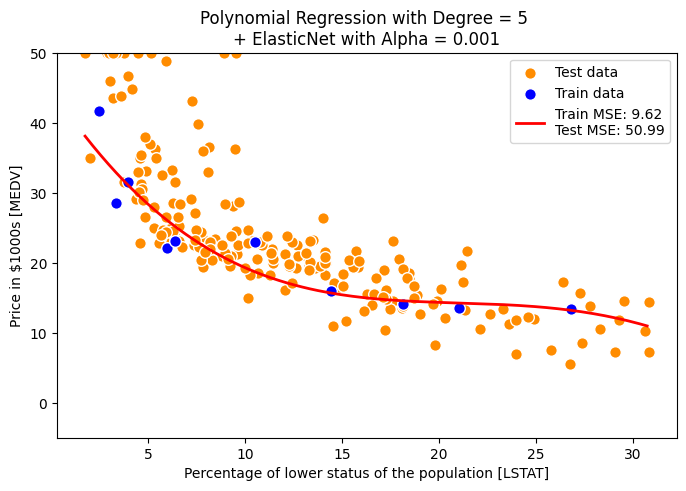

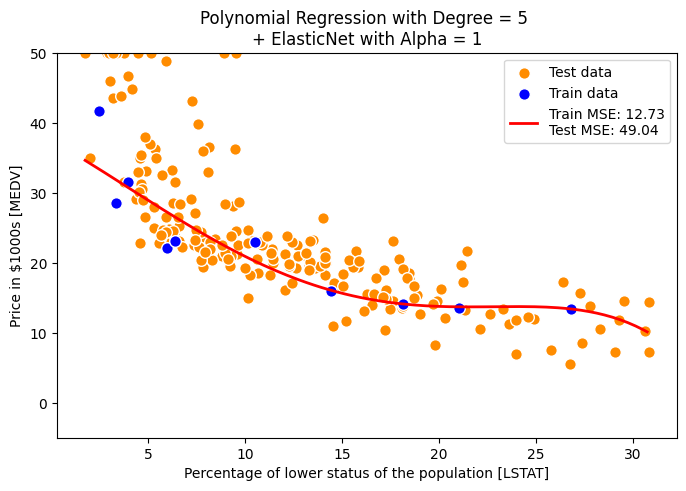

In [ ]:
from sklearn.linear_model import ElasticNet

alphas = [0.001, 1]

for alpha in alphas:
  regr_enet = ElasticNet(alpha=alpha)
  regr_enet.fit(X_poly, y)
  y_poly_fit = regr_enet.predict(poly.fit_transform(X_fit))

  plt.figure(figsize=(8,5))
  plt.scatter(X_test, y_test, c='darkorange', edgecolor='white', s=70, label='Test data')
  plt.scatter(X, y, c='blue', edgecolor='white', s=70, label='Train data')

  # Calculate MSE
  poly_mse = mean_squared_error(y, regr_enet.predict(X_poly))
  poly_mse_test = mean_squared_error(y_test, regr_enet.predict(X_poly_test))

  plt.plot(X_fit, y_poly_fit, color='red', lw=2, label='Train MSE: %s\nTest MSE: %s' % (round(poly_mse,2), round(poly_mse_test, 2)))

  plt.xlabel('Percentage of lower status of the population [LSTAT]')
  plt.ylabel('Price in $1000s [MEDV]')
  plt.ylim(-5, 50)
  
  plt.title("Polynomial Regression with Degree = %s \n+ ElasticNet with Alpha = %s" % (degree, alpha))
  plt.legend()
  plt.show()

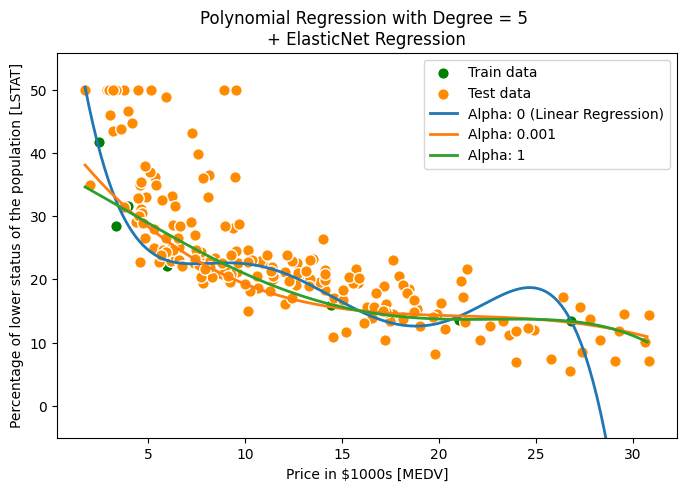

In [ ]:
# Summary plot
plt.figure(figsize=(8,5))

plt.scatter(X, y, c='green', edgecolor='white', s=70, label='Train data')
plt.scatter(X_test, y_test, c='darkorange', edgecolor='white', s=70, label='Test data')

regr = LinearRegression()
regr.fit(X_poly, y)
y_poly_fit = regr.predict(poly.fit_transform(X_fit))
plt.plot(X_fit, y_poly_fit, lw=2, label='Alpha: 0 (Linear Regression)')

for alpha in alphas:
  regr_enet = ElasticNet(alpha=alpha)
  regr_enet.fit(X_poly, y)
  y_poly_fit = regr_enet.predict(poly.fit_transform(X_fit))
  plt.plot(X_fit, y_poly_fit, lw=2, label='Alpha: %s'% alpha)

plt.ylim(-5)
plt.ylabel('Percentage of lower status of the population [LSTAT]')
plt.xlabel('Price in $1000s [MEDV]')

plt.title("Polynomial Regression with Degree = %s \n+ ElasticNet Regression" % (degree))
plt.legend()
plt.show()

😎